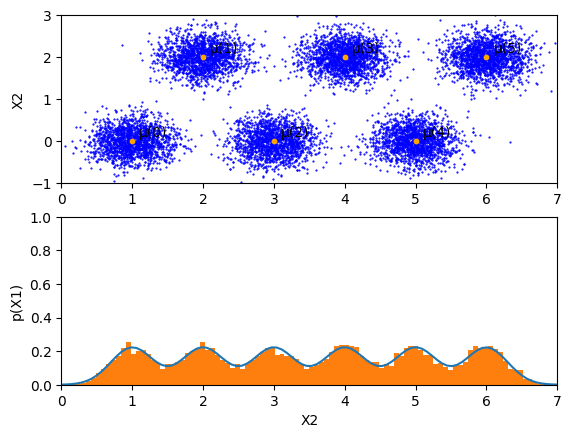

In [1]:
# Fig 4.3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

targetXs = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
targetYs = [0.0, 2.0, 0.0, 2.0, 0.0, 2.0]

N = 10000
sigma = 0.3
M = 100
binNum = 100

xmin = 0.0
xmax = 7.0
ymin = -1.0
ymax = 3.0

pointedXs = []
pointedYs = []

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.set_xlim((xmin, xmax))
ax1.set_ylim((ymin, ymax))
ax1.set_ylabel("X2")

for i in range(len(targetXs)):
    ax1.annotate("μ("+str(i)+")", xy = (targetXs[i]+0.1, targetYs[i]+0.1), size = 10)

for i in range(N):
    d = int(np.floor(len(targetXs) * np.random.rand()))

    # sigma for x, y is sigma^2 * I. 
    pointedXs.append(targetXs[d] + sigma * np.random.randn())
    pointedYs.append(targetYs[d] + sigma * np.random.randn())
    
ax1.scatter(pointedXs, pointedYs, s = 0.3, c = "blue")
ax1.scatter(targetXs, targetYs, s = 10, c = "orange")

# p(x | d(i)) = N(x | d(i), sigma^2). refer (2.51)
xs = np.linspace (xmin, xmax, M)

pX1s = []
for x in xs:
    pX1 = 0
    n = len(targetXs)

    for t in targetXs:
        pX1 += 1/n * norm.pdf(x, loc = t, scale = sigma)

    pX1s.append(pX1)

ax2.plot(xs, pX1s)
ax2.set_xlim((xmin, xmax))
ax2.set_ylim((0, 1.0))
ax2.hist(pointedXs, bins = binNum, range = (xmin, xmax), density=True)
ax2.set_ylabel("p(X1)")
ax2.set_xlabel("X2")

plt.show()


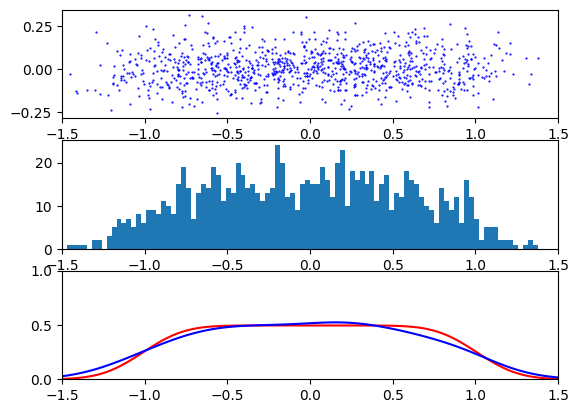

In [2]:
# Fig. 4.12

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 1000
sigma = 0.2
M = 100
binNum = 100

# equal to sigma
bandWidth = sigma

xmin = -1.5
xmax = 1.5

pointedXs = []
pointedYs = []

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.set_xlim((xmin, xmax))

for i in range(N):
    # sigma for x is sigma^2 * I. 
    pointedXs.append(2*np.random.rand() - 1 + sigma * np.random.randn())
    pointedYs.append(0.5 * sigma * np.random.randn())
    
ax1.scatter(pointedXs, pointedYs, s = 0.3, c = "blue")

ax2.hist(pointedXs, bins = binNum, range = (xmin, xmax))
ax2.set_xlim((xmin, xmax))

# p(x | d(i)) = N(x | d(i), sigma^2). refer (2.51)
xs = np.linspace (xmin, xmax, M)

pX1s = []
for x in xs:
    pX1 = 0

    for x2 in np.linspace (-1, 1, M):
        pX1 += 1/M * norm.pdf(x, loc = x2, scale = sigma)

    pX1s.append(pX1)

estimatedPX1s = []
for x in xs:
    pX1 = 0
    for x2 in pointedXs:
        pX1 += 1/N * norm.pdf(x, loc = x2, scale = bandWidth)
    estimatedPX1s.append(pX1)

ax3.plot(xs, pX1s, color = "red")
ax3.set_xlim((xmin, xmax))
ax3.set_ylim((0, 1.0))
ax3.plot(xs, estimatedPX1s, color = "blue")

plt.show()
